In [1]:
from strikepoint.driver import LeptonDriver
from IPython.display import Image, display
from picamera2 import Picamera2
from time import sleep

import cv2
import numpy as np

picam = Picamera2()


[114:22:47.162629618] [50817]  INFO Camera camera_manager.cpp:330 libcamera v0.5.2+99-bfd68f78
[114:22:47.171299327] [50832]  INFO RPI pisp.cpp:720 libpisp version 1.3.0
[114:22:47.173731608] [50832]  INFO IPAProxy ipa_proxy.cpp:180 Using tuning file /usr/share/libcamera/ipa/rpi/pisp/imx708.json
[114:22:47.181002416] [50832]  INFO Camera camera_manager.cpp:220 Adding camera '/base/axi/pcie@1000120000/rp1/i2c@88000/imx708@1a' for pipeline handler rpi/pisp
[114:22:47.181017471] [50832]  INFO RPI pisp.cpp:1179 Registered camera /base/axi/pcie@1000120000/rp1/i2c@88000/imx708@1a to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_D0


In [2]:
def showFrame(frame):
    ok, buf = cv2.imencode('.png', frame)
    if not ok:
        raise RuntimeError("Could not encode frame to PNG")
    display(Image(data=buf.tobytes()))

[114:22:48.411305226] [50817]  INFO Camera camera.cpp:1215 configuring streams: (0) 640x480-XBGR8888/sRGB (1) 1536x864-BGGR_PISP_COMP1/RAW
[114:22:48.411412135] [50832]  INFO RPI pisp.cpp:1483 Sensor: /base/axi/pcie@1000120000/rp1/i2c@88000/imx708@1a - Selected sensor format: 1536x864-SBGGR10_1X10/RAW - Selected CFE format: 1536x864-PC1B/RAW


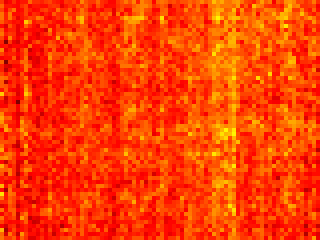

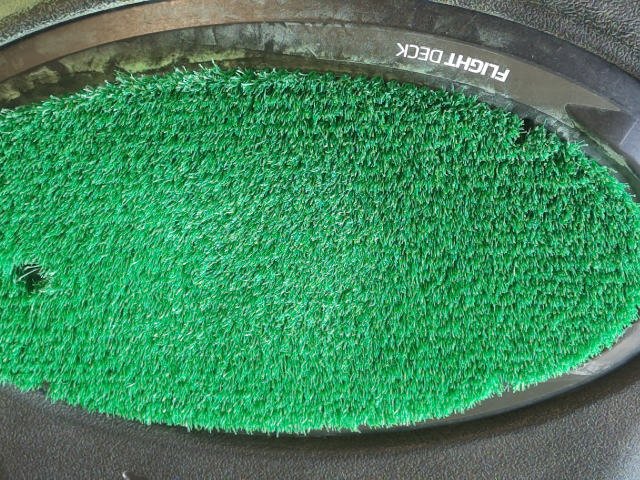

In [ ]:
from strikepoint.producer import FrameProducer

with LeptonDriver() as driver:
    driver.setLogFile('logsFromDevNotebook.log')
    driver.startPolling()
    # TODO: Use Picamera2 to set up the camera properly
    # picam2 = Picamera2()
    producer = FrameProducer(driver, picam, fps=9, depth=4)
    sleep(1) # Give the camera some time to warm up
    # this is bad, need something to synchronize here
    showFrame(producer.lastThermalRaw)
    showFrame(producer.lastVisualRaw)
    producer.stop()